## Author : Moumita Murmu

## Task 3: Create Retail Dashboard 
### (By Performing Exploratory Data Analysis on Retail Data)

## Purpose: 

1. To find weak areas where we can work to make more profits.
2. What all business problems can you derive by exploring the data.

### The Sparks Foundation - GRIP

In [1]:
#### importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

In [2]:
#### Get data

data = pd.read_csv(r'.........................\dataset\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Dataset with 9994 records/datapoints & 13 Columns

In [4]:
### Lets analyse the numerical variables 

data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
print('The total Sales: ', data['Sales'].sum())  #### for total sales
print('The total Quantity of Products Sold: ', data['Quantity'].sum())  #### for total quantity sold
print('The total Discount Offered: ', data['Discount'].sum())  #### for total Discount
print('The total Profit: ', data['Profit'].sum())  #### for total Profit

The total Sales:  2297200.8603
The total Quantity of Products Sold:  37873
The total Discount Offered:  1561.09
The total Profit:  286397.0217


#### Inference:

1. Sales:
   * Average Sales - 229.85 ~ 230. 
   * Min sales: 0.444 
   * Max sales: 22638.48
   * 75% of the transactions in the dataset have sales below 209.94
   * Only a few transactions have higher sales record.
   * The total Sales:  2297200.8603
_________   
2. Quantity:
   * Avg. Quantity: 3.789 ~ 4. 
   * Min Qty Sold: 1
   * Max Qty Sold: 14
   * 75% of the transactions have purchased quantities below 5.
   * The total Quantity of Products Sold:  37873
__________   
3. Discount:
   * Avg Disount Offered - 0.15
   * Max Discount Offered - 0.80, 
   * Min DIscount Offered - 0
   * The total Discount Offered:  1561.09
__________   
4. Profit:
   * Avg Profit: 28.6568
   * Min Profit: -6599.978 (Incurred Loss)
   * Max Profit: 8399.97
   * 75% of the transactions have a earned profit below 29.36
   * Only a few transactions can have higher profits.
   * The total Profit:  286397.0217

#### Lets see which are these categories and from which region got such outcomes

In [6]:
### Lets analyse the categorical variables 

data.describe(include=np.object)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


#### Inference:
1. Most orders are shipped through - STANDARD CLASS (59.71%).
2. Most orders are from the Segment - CONSUMER (51.94%).
3. Most orders are from the City - NEW YOR CITY (9.15%).
4. Most orders are from the State - CALIFORNIA (~20%).
5. Most orders are from the Region - WEST (32.04%).
6. Most orders are from the Category - OFFICE SUPPLIES (60.29%).
7. Most orders are from the Segment - BINDERS (15.24%).
8. All the orders are from a single country - United States.

In [7]:
#### Exploring each categorical variables in detail:

for i in range(data.shape[1]):
    col_name = data.columns[i]
    print('For Column Name: ', col_name)
    print('Unique Categories: ', len(data[col_name].value_counts().unique()))
    print('')
    print(data[col_name].value_counts())
    print('--------------------------------')
    print('')
    

For Column Name:  Ship Mode
Unique Categories:  4

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
--------------------------------

For Column Name:  Segment
Unique Categories:  3

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
--------------------------------

For Column Name:  Country
Unique Categories:  1

United States    9994
Name: Country, dtype: int64
--------------------------------

For Column Name:  City
Unique Categories:  70

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Portage            1
Conway             1
San Mateo          1
Waterloo           1
Rogers             1
Name: City, Length: 531, dtype: int64
--------------------------------

For Column Name:  State
Unique Categories:  45

California              2001
New York                1128
Texas                    985
Penn

### Inference:
1. Ship Mode: 4 categories - Standard Class, Scond Class, First Class, Same Day. Max- Standard Class
2. Segment: 3 categories - Consumer, Corporate, Home Office. Max - Consumer
3. Country: 1 Category - The data is from a single country: United States
4. City: 531 Category, Max - New Yor City
5. State: 49 Category, Max - California
6. Region: 4 Category, Max - West
7. Category: 3 Category, Max - Office Supplies
8. Sub Category: 17 Categories, Max - Binders

### Removing columns: Postal Code & Country (Postal code doesn't offer necessary information and the records are from the same country - United States. 

In [8]:
retail_data = data.drop(['Postal Code', 'Country'], axis=1)
retail_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##### Missing Value

In [9]:
retail_data.isnull().sum(axis=0)

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

     No missing values in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A83A360CA0>,
      dtype=object)

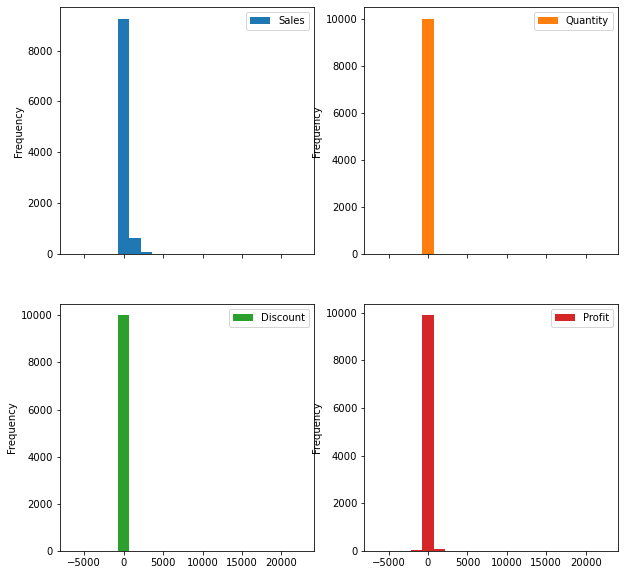

In [10]:
retail_data.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

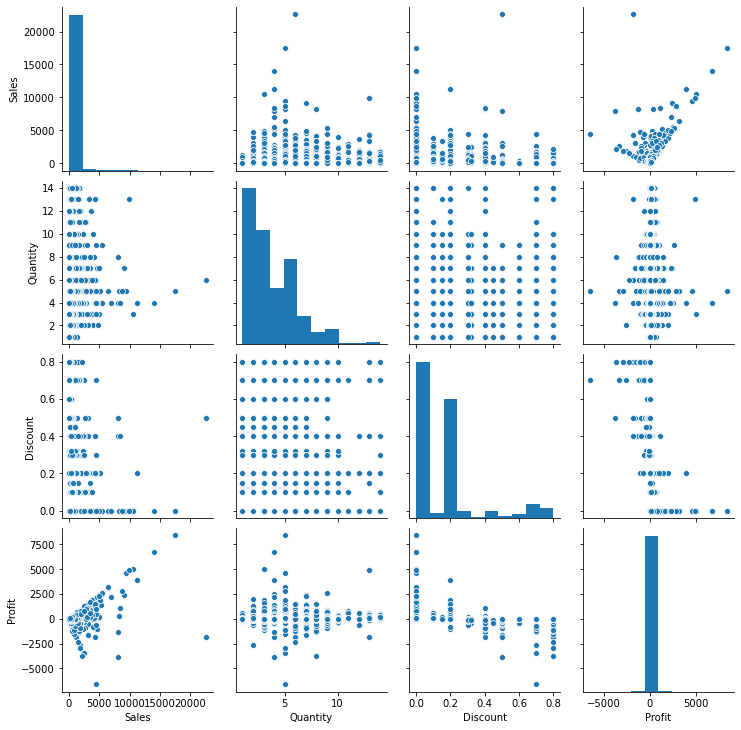

In [11]:
sns.pairplot(retail_data)

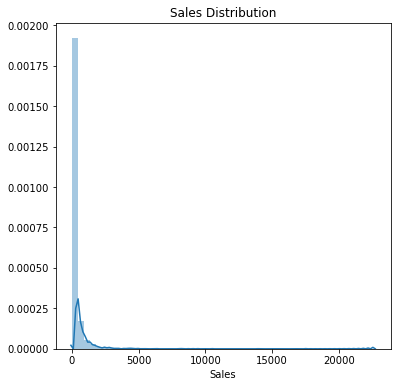

In [12]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(retail_data['Sales'])
plt.title('Sales Distribution')
plt.show()

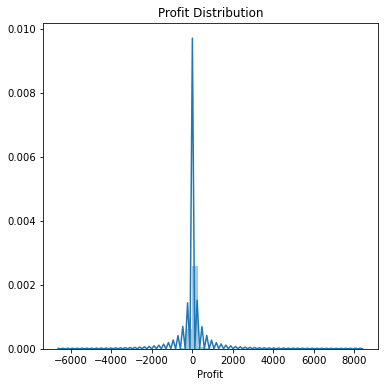

In [13]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(retail_data['Profit'])
plt.title('Profit Distribution')
plt.show()

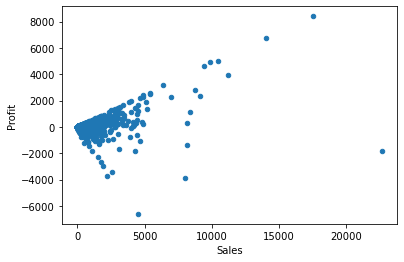

In [14]:
retail_data.plot(x="Sales", y="Profit", kind="scatter")

## Data Visualization

### 1. Shipping Mode Distribution

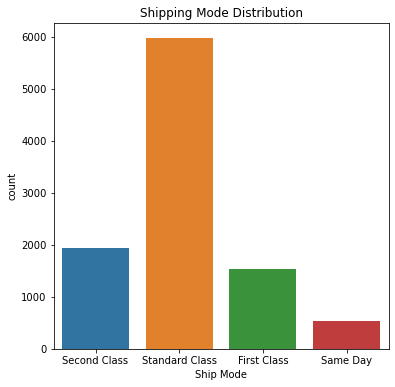

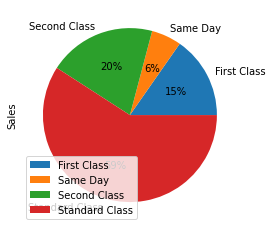

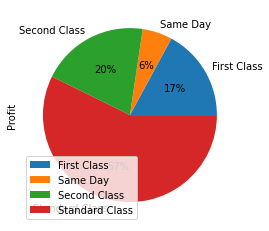

##### Inference:
Shipment mode with highest sales -> Standard Class. With higher sales, we see higher profit.

### 2.Segment Wise Distribution

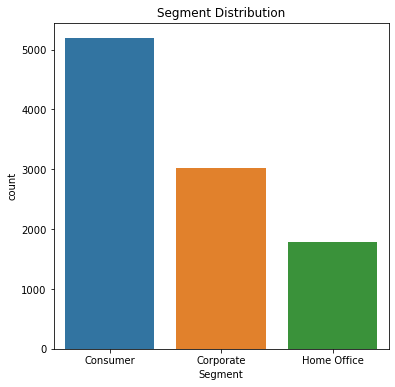

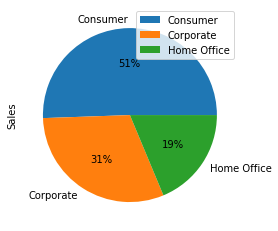

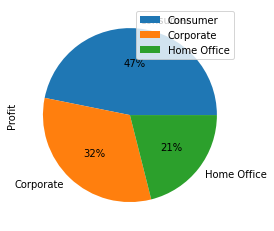

#### Inference:
Segments with highest sales & Profit -> Consumer (Sales: 51%, Profit: 47%)

### 3. Region Wise Distribution

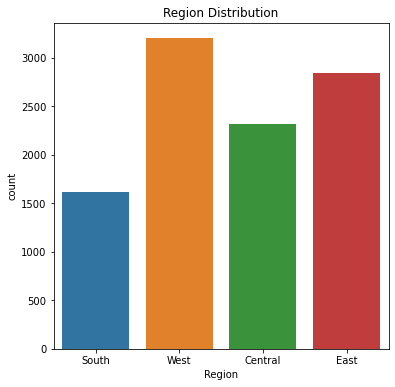

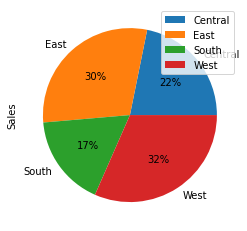

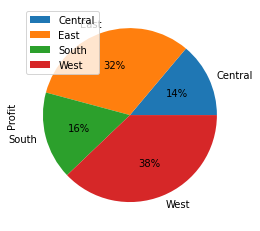

#### Inference:
Region (Sales, Profit)
* West    (32%, 38%) - Which Category & Subcategory products are giving higher profits
* East    (30%, 32%) - Which Category & Subcategory products are giving higher profits
* Central (22%, 14%)
* South   (17%, 16%)

West & East have major records of transactions. South is the region with least no. of transactions.

### 4.Category Wise Distribution

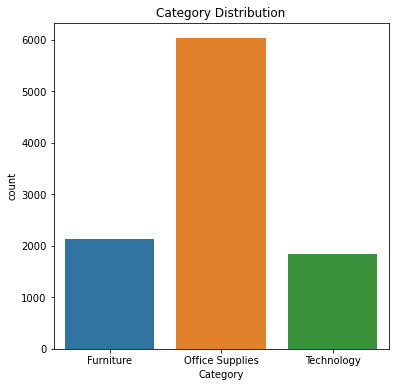

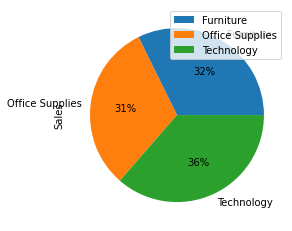

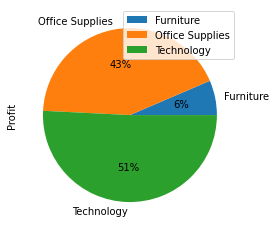

#### Inference:
Category (Sales, Profit)
* Office Supplies (31%, 43%) - Which Subcategory products are giving higher profits
* Technology      (36%, 51%) - Which Subcategory products are giving higher profits
* Furnitures      (32%, 6%)  - Furniture have lower profit. Which are these region where furnitures are sold?

Maximum transactions were made for Office supplies

### 5. SubCategory wise Distribution

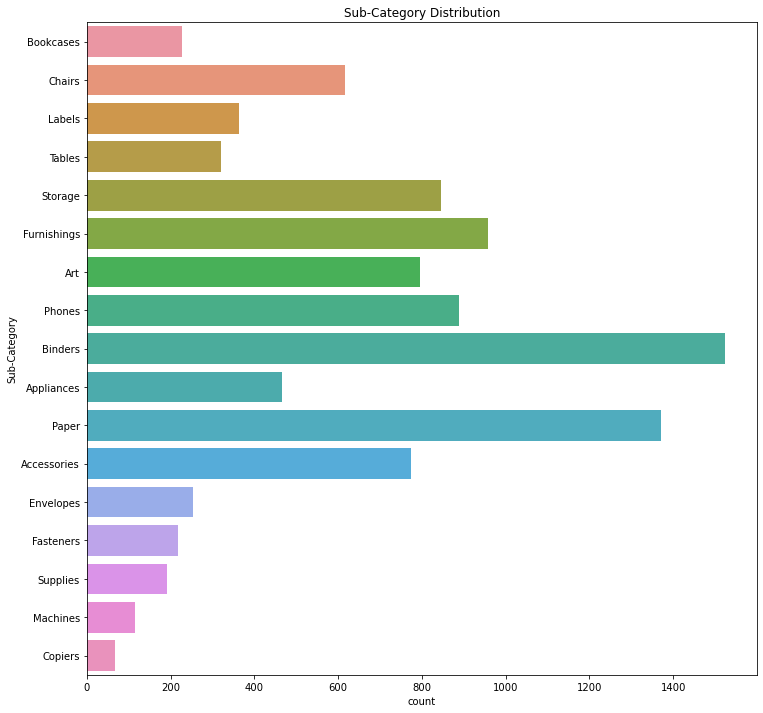

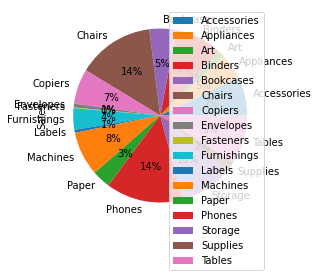

### 6. State wise Distribution

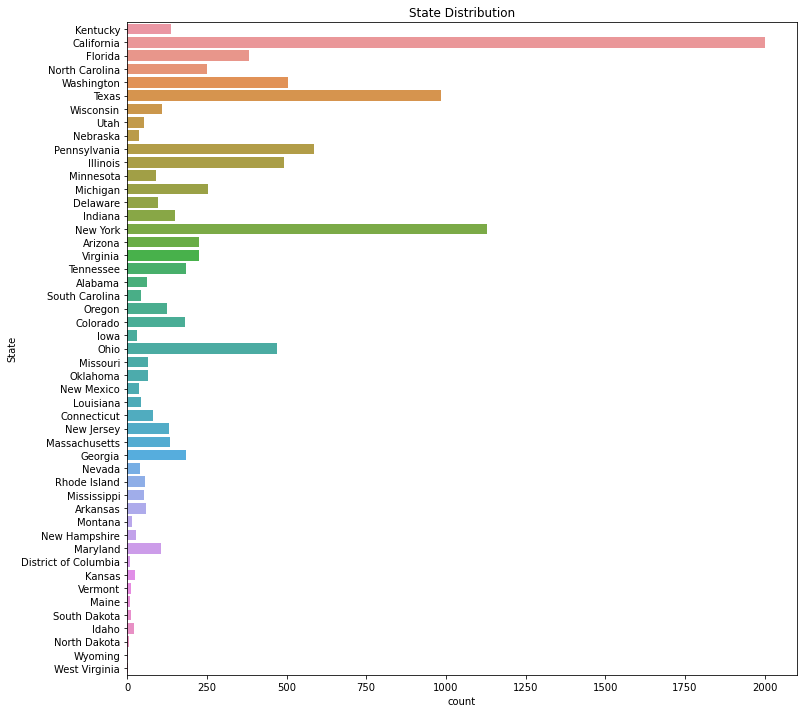

### 7. City Wise Distribution

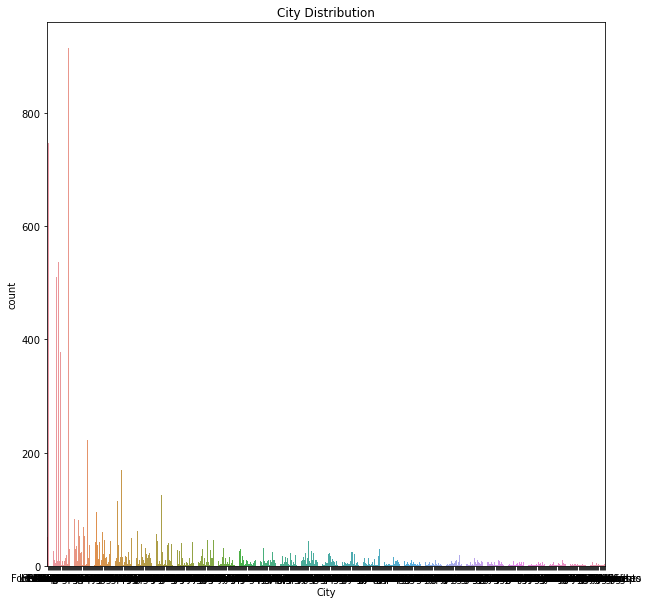

In [30]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(20,20))
sns.countplot(x='City', data=retail_data)
plt.title('City Distribution')
plt.show()

In [31]:
retail_data['City'].value_counts().head(50)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Louisville        57
Miami             57
Rochester         53
Charlotte         52
Henderson         51
Lakewood          49
Lancaster         46
Fairfield         45
Milwaukee         45
Denver            44
Lawrence          44
Baltimore         43
Pasadena          42
San Jose          42
Cleveland         42
Fayetteville      41
Salem             40
Austin            39
Atlanta           39
Franklin          37
Huntsville        36
Wilmington        36
Tampa             36
Decatur           35
Tucson            32
Toledo       

### 8. Category Wise Total Quantity Purchased/Ordered:

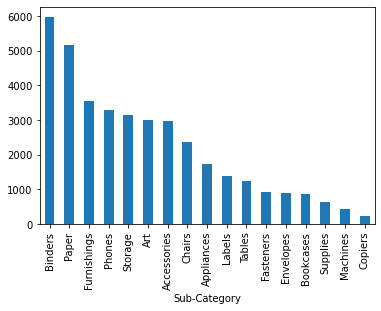

### 9. Segment Wise Total Quantity Purchased/Ordered:

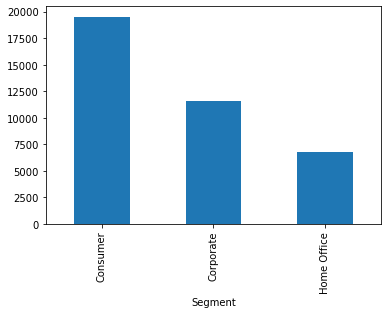

### 10. Region Wise Total Quantity Ordered/Purchased:

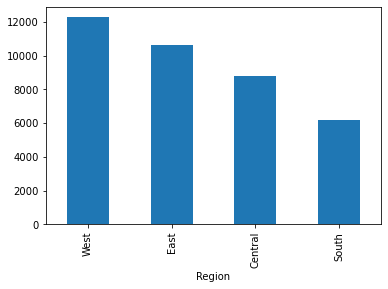

### 11. Leading States With Highest Quantity Ordered/Purchased:

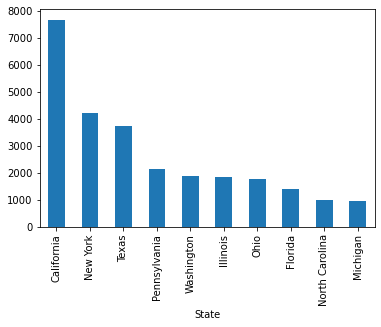

### 12.Sub-Categories On which Max. DIscounts were Offered:

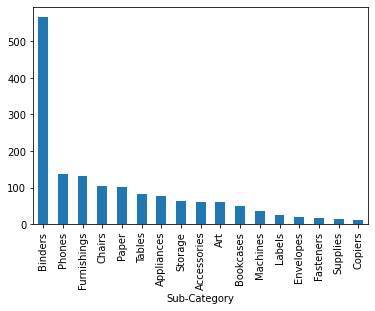

### 13. Segments with Max. Discounts Offered:

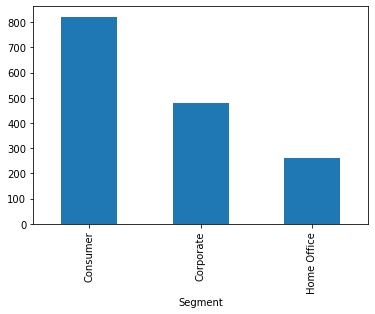

### 14. Sub-Category With Highest Profit 

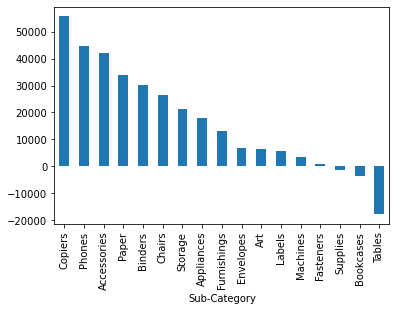

_____________________________________________________________

### 15. Segment & Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. Segment with Maximum sales

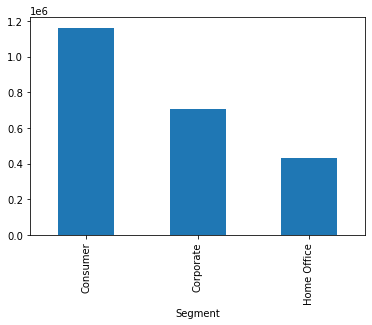

### B. Segment & Category Wise Sales Summary

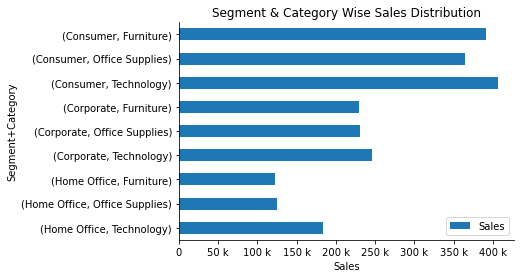

### C. Segment with Maximum Profit

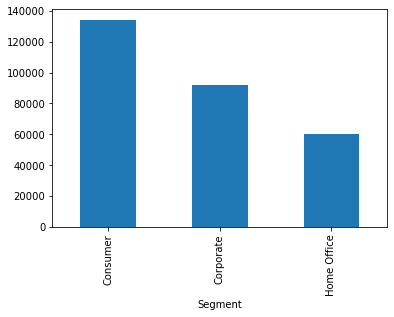

### D. Segment & category Wise Profit DIstribution

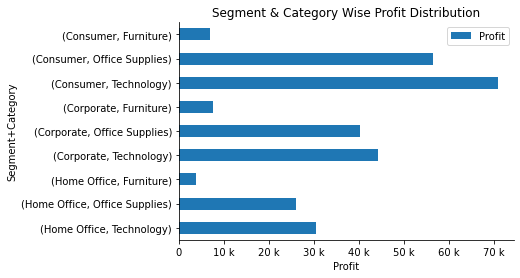

### E.  With Maximum Discount

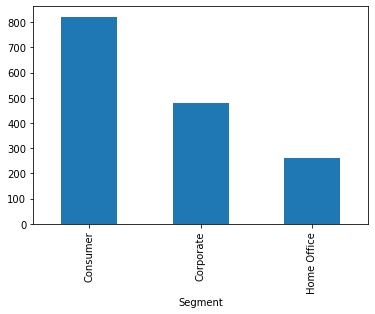

### F. Segment & category Wise Discount Distribution

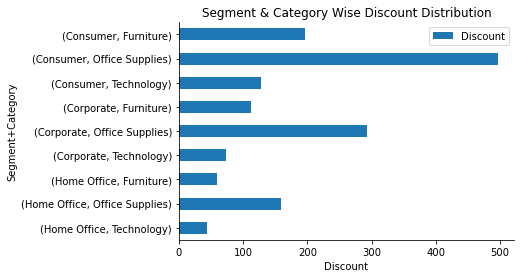

### G. Segment With Maximum Quantity Ordered/Purchased

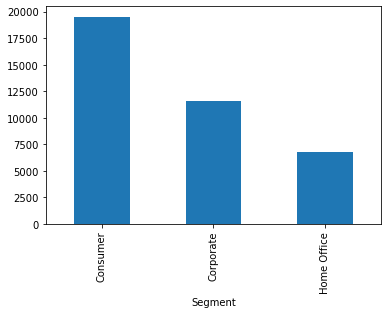

### H. Segment & category Wise Quantity Distribution

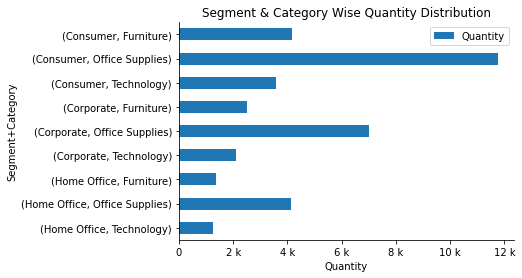

____________________________________________________

### 16. Category & Sub-Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. Categories With maximum sales

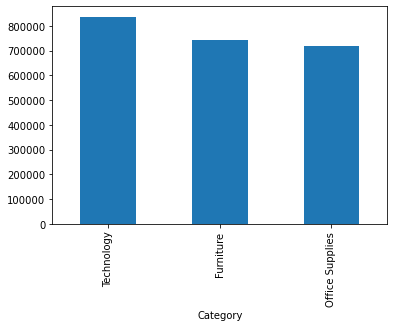

Category wise Sales:
* Furniture: 741999.79
* Office Supplies: 719047.032
* Technology: 836154.033

### B. Category & Sub-Category wise Sales Summary

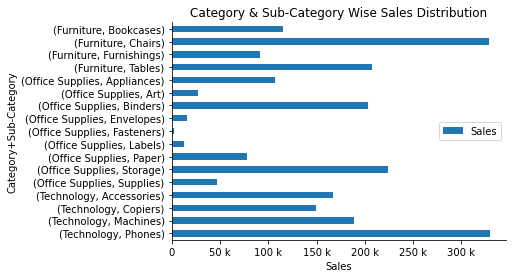

Major selling product across categories:
* Furniture: Furnishings, Chairs
* Office Supplies: Binders, Papers, Storage, Art
* Technology: Phones, Accessories

### C. Categories With maximum profit

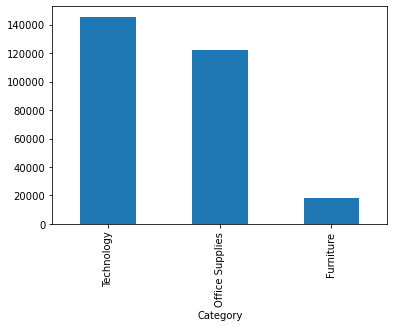

Category wise Profit:
* Furniture: 18451.2728
* Office Supplies: 122490.8008 
* Technology: 145454.9481

### D. Category & Sub-Category wise Profit Summary

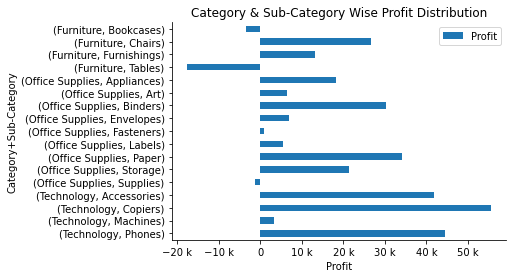

* Tables and Bookcases under Furniture category incurred losses.
* Supplies under Office Supplies incurred losses.

### E.  with Maximum Discounts Offered

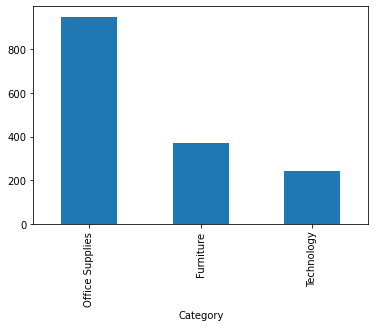

### F. Category & Sub-category Wise Discount Distribution

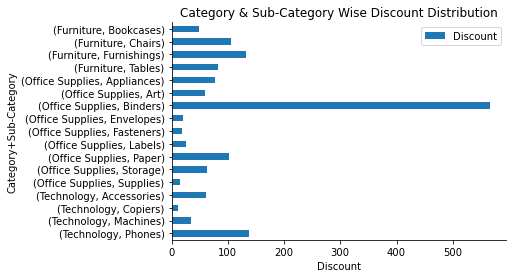

### G. Categories with Maximum Quantity Ordered/Purchased

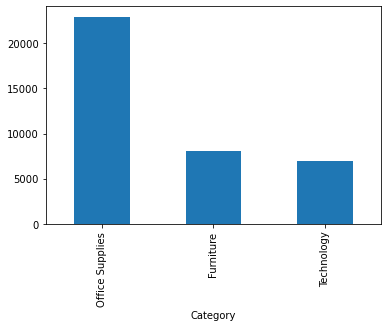

### H. Category & Sub-category Wise Quantity Distribution

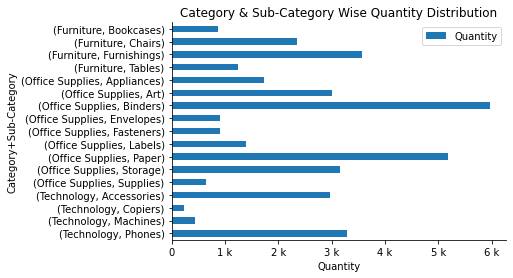

Major selling product across categories:
* Furniture: Furnishings, Chairs
* Office Supplies: Binders, Papers, Storage, Art
* Technology: Phones, Accessories

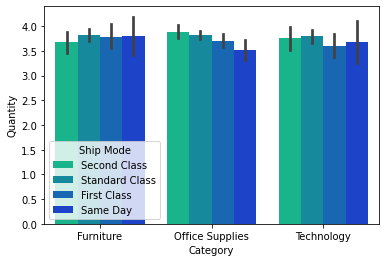

_________________________________________

### 17. Sub-Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. Sub-Categories With maximum sales

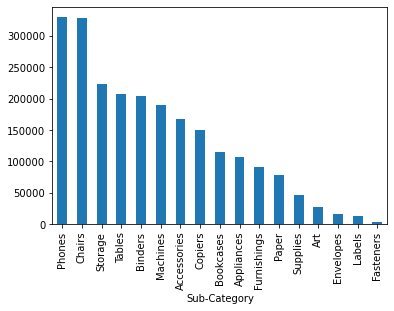

### B. Sub-Categories With maximum profit

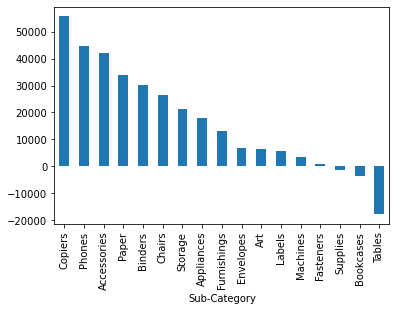

### C. Sub-Categories With maximum Discount

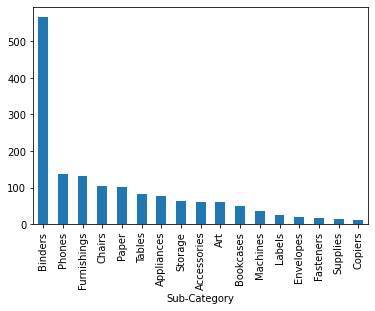

### D. Sub-Categories With maximum Quantity

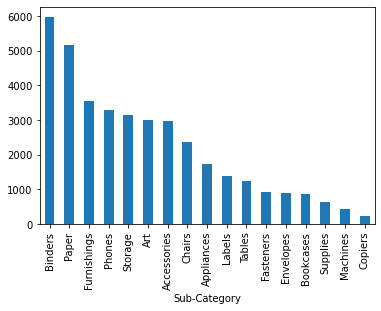

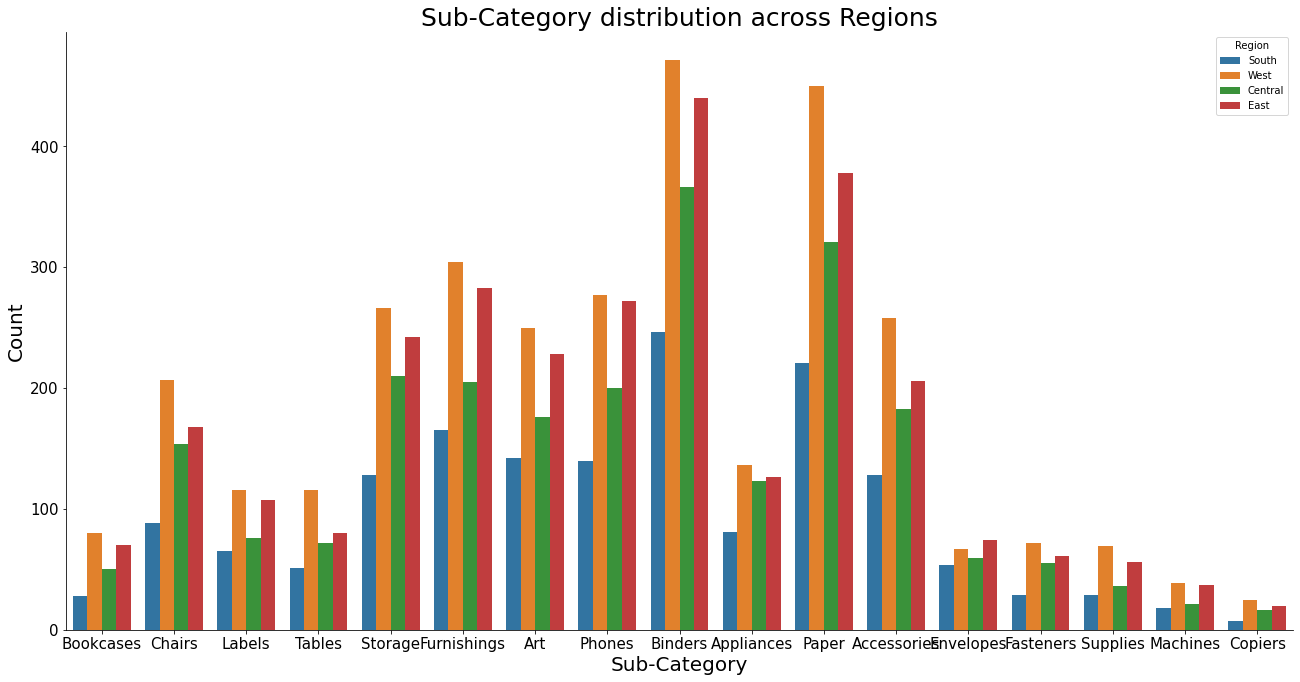

### 18. Region & Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. Region With maximum sales

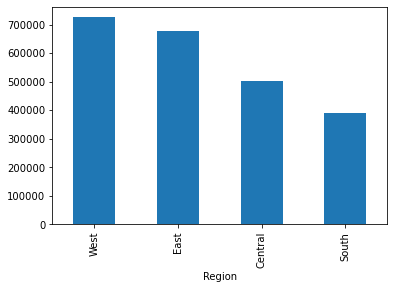

Region wise Sales:
* Central: 501239.8908
* East: 678781.24
* West: 725457.8245
* South: 391721.905

### B. Region & Category Wise Sales Distribution

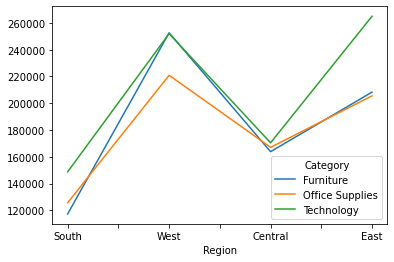

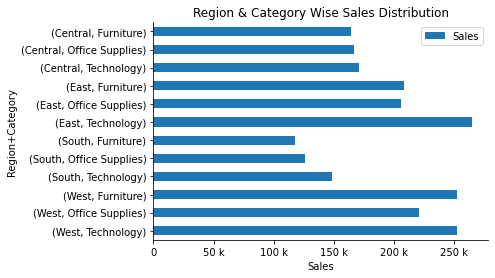

### C. Region With maximum profit

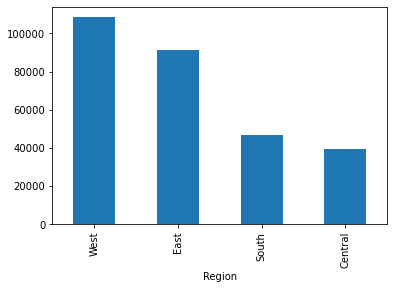

* Max. profit earned from Region: West
* In Central region only, in the furniture category, we can see some losses incurred.
* In cental region, Max. profit was seen in Technology category
* In East region, Max. profit was seen in Technology category and Office Supplies category.
* In South region as well, we can see major profits gained in Office Supplies & Technology category.
* In west region, We can see max profit was gained in Technology category and Office supplies categories.

### D. Region & Category Wise Profit Distribution

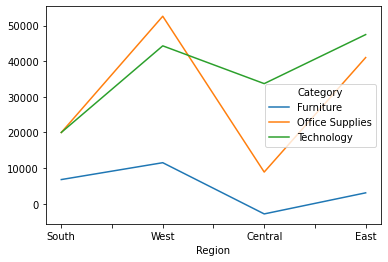

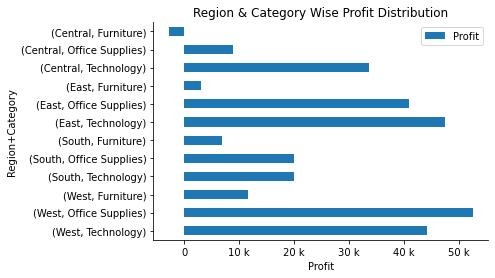

Region wise Profit:
* Central: 39706.3625
* East: 91522.78
* South: 46749.4303
* West: 108418.4489

### E. Regions with Maximum Discounts Offered

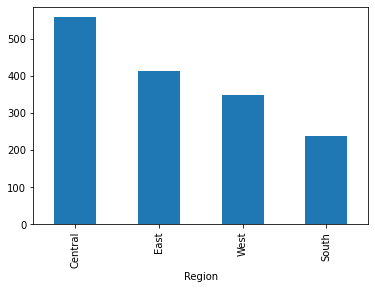

### F. Region & Category Wise Discount Distribution

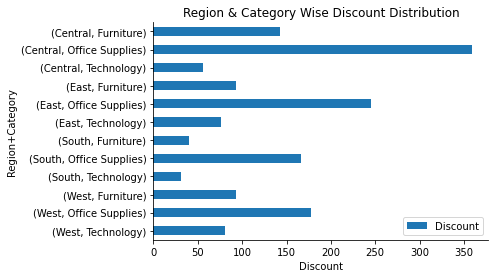

### G. Region With Maximum Quantity Ordered/Purchased

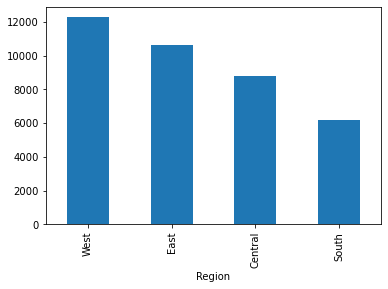

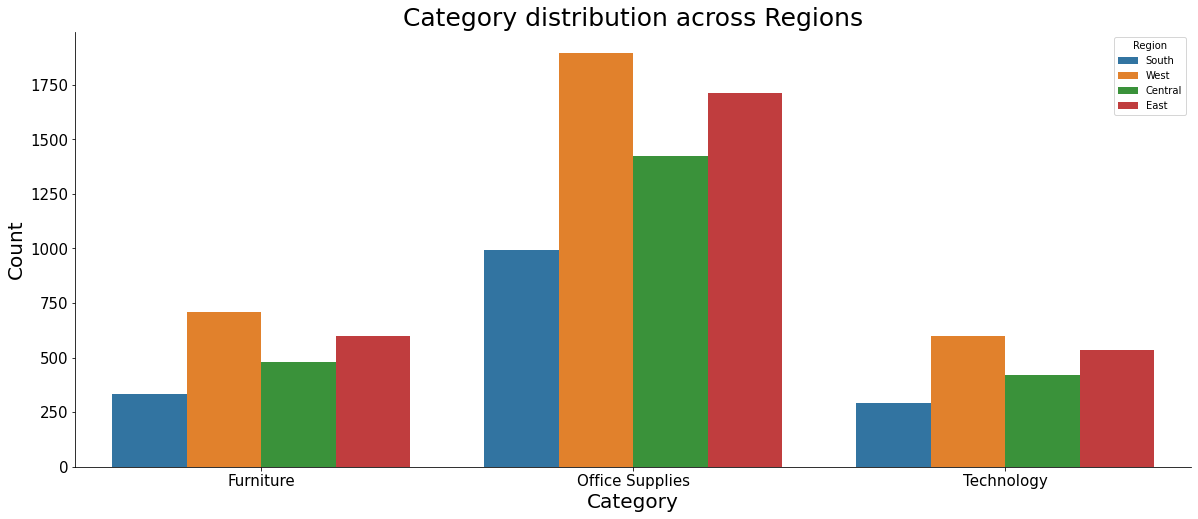

### H. Region & Category Wise Quantity Distribution

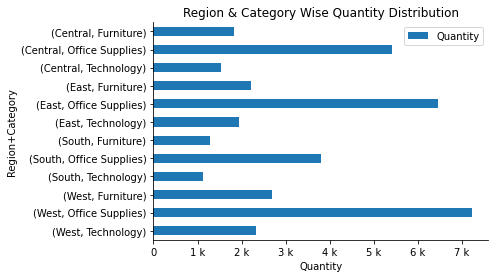

___________________________________

* Furniture: West Region had maximum sales of products
* Office Supplies: West Region had maximum sales of office supplies category product
* Technology: East region had maximum sales of this category product

### 19. To find the best performing regions in terms of sales of sub-category products

In [74]:
df_subcat_reg_pivot = pd.pivot_table(retail_data,['Sales'],['Sub-Category','Region'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_subcat_reg_pivot.reindex(df_subcat_reg_pivot['Sales'].sort_values(ascending=False).index)

Sales
Sub-Category Region             
Chairs       West     101781.328
Phones       East     100614.982
             West      98684.352
Chairs       East      96260.683
             Central   85230.646
...                          ...
Labels       South      2353.180
Fasteners    West        923.216
             East        819.718
             Central     778.030
             South       503.316

[68 rows x 1 columns]

In [75]:
df_subcat_reg_pivot.head(50)

Sales
Sub-Category Region              
Accessories  Central   33956.0760
             East      45033.3720
             South     27276.7540
             West      61114.1160
Appliances   Central   23582.0330
             East      34188.4660
             South     19525.3260
             West      30236.3360
Art          Central    5765.3400
             East       7485.7640
             South      4655.6220
             West       9212.0660
Binders      Central   56923.2820
             East      53497.9970
             South     37030.3410
             West      55961.1130
Bookcases    Central   24157.1768
             East      43819.3340
             South     10899.3620
             West      36004.1235
Chairs       Central   85230.6460
             East      96260.6830
             South     45176.4460
             West     101781.3280
Copiers      Central   37259.5700
             East      53219.4620
             South      9299.7560
             West      49749.2420
Envelopes    Central    4636.8720
             East       4375.8740
             South      3345.5560
             West       4118.1000
Fasteners    Central     778.0300
             East        819.7180
             South       503.3160
             West        923.2160
Furnishings  Central   15254.3700
             East      29071.3800
             South     17306.6840
             West      30072.7300
Labels       Central    2451.4720
             East       2602.9340
             South      2353.1800
             West       5078.7260
Machines     Central   26797.3840
             East      66106.1650
             South     53890.9600
             West      42444.1220
Paper        Central   17491.9020
             East      20172.6020

Highest Sales in each region in each Sub-Categories:
* Accessories: West
* Appliances: East
* Art: West
* Binders: Central
* Bookcases: East
* Chairs: West
* Copies: East
* Envelopes: Central
* Fasteners: West
* Furnishings: West
* Labels: West
* Machines: East
* Paper: West
* Phones: East
* Storages: East
* Supplies: West
* Tables: West

In [76]:
df_subcat_reg_pivot.tail(20)

Sales
Sub-Category Region             
Paper        Central   17491.902
             East      20172.602
             South     14150.984
             West      26663.718
Phones       Central   72403.282
             East     100614.982
             South     58304.438
             West      98684.352
Storage      Central   45930.112
             East      71612.584
             South     35768.060
             West      70532.852
Supplies     Central    9467.372
             East      10760.116
             South      8318.928
             West      18127.122
Tables       Central   39154.971
             East      39139.807
             South     43916.192
             West      84754.562

__________

### 20. State & Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. Top 20 State with maximum sales

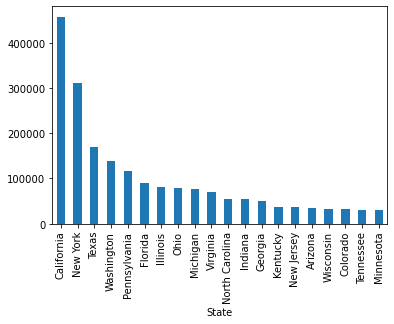

California is the states with maximum sales

### B. State & Category Wise Sales Distribution

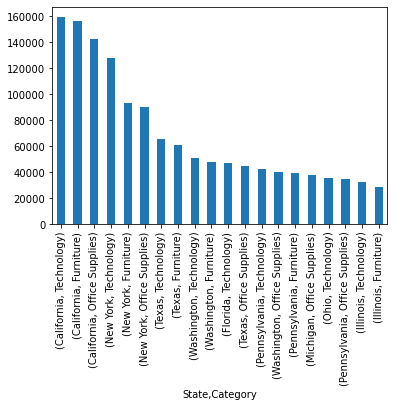

States with maximum sales & their regions:

* Central: Texas (170188.0458), Illinois(80166.1010), Michigan (76269.6140) have highest sales in this region
* East: New Your (310876.2710) & Pennsylvania (116511.9140) have highest sales in this region
* South: Florida (89473.7080) & Virginia(70636.72) have highest sales in this region
* West: California(457687.6315) & Washington(138641.27) have highest sales in this region

### C. 10 States with minimum sales

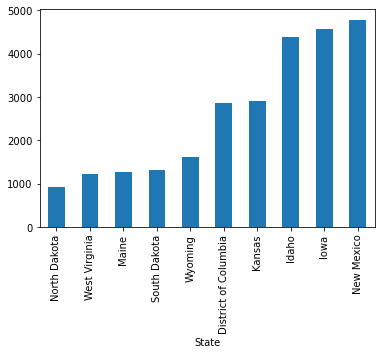

### D. Top 10 States with maximum profit gained

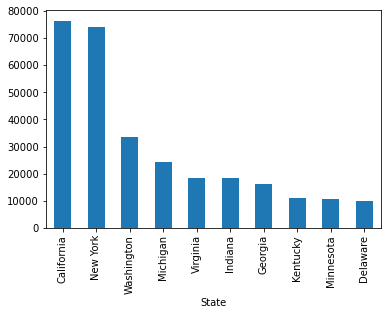

### E. State & Category Wise Profit Distribution

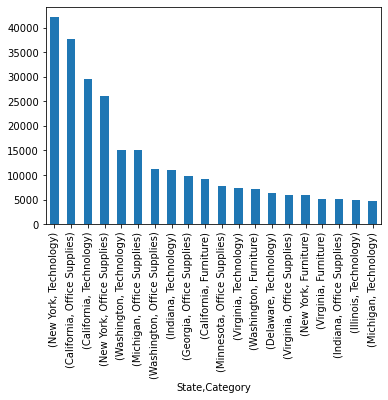

### Region & State Wise Profit Distribution

In [93]:
df_cat_state_pro_pivot = pd.pivot_table(retail_data,['Profit'],['Region','State'], aggfunc=np.sum)  ## aggfunc bydefault calculates mean.
df_cat_state_pro_pivot.reindex(df_cat_state_pro_pivot['Profit'].sort_values(ascending=False).index)
df_cat_state_pro_pivot

Profit
Region  State                           
Central Illinois             -12607.8870
        Indiana               18382.9363
        Iowa                   1183.8119
        Kansas                  836.4435
        Michigan              24463.1876
        Minnesota             10823.1874
        Missouri               6436.2105
        Nebraska               2037.0942
        North Dakota            230.1497
        Oklahoma               4853.9560
        South Dakota            394.8283
        Texas                -25729.3563
        Wisconsin              8401.8004
East    Connecticut            3511.4918
        Delaware               9977.3748
        District of Columbia   1059.5893
        Maine                   454.4862
        Maryland               7031.1788
        Massachusetts          6785.5016
        New Hampshire          1706.5028
        New Jersey             9772.9138
        New York              74038.5486
        Ohio                 -16971.3766
        Pennsylvania         -15559.9603
        Rhode Island           7285.6293
        Vermont                2244.9783
        West Virginia           185.9216
South   Alabama                5786.8253
        Arkansas               4008.6871
        Florida               -3399.3017
        Georgia               16250.0433
        Kentucky              11199.6966
        Louisiana              2196.1023
        Mississippi            3172.9762
        North Carolina        -7490.9122
        South Carolina         1769.0566
        Tennessee             -5341.6936
        Virginia              18597.9504
West    Arizona               -3427.9246
        California            76381.3871
        Colorado              -6527.8579
        Idaho                   826.7231
        Montana                1833.3285
        Nevada                 3316.7659
        New Mexico             1157.1161
        Oregon                -1190.4705
        Utah                   2546.5335
        Washington            33402.6517
        Wyoming                 100.1960

States with maximum profits/losses & their regions:

* Central: Michigan (24463.1876) and Indiana (18382.9363) have highest profits in this region. Texas (-25729.3563) & Illinois(-12607.8870) have incurred huge losses irrespective of higher sales.

* East: New York(74038.5486) have highest profits in this region. Ohio (-16971.3766) & Pennsylvania(-15559.9603) have incurred huge losses. Lowest profits: West Virginia (185.9216)

* South: Virginia(18597.9504), Georgia(16250.0433) & Kentucky(11199.6966) have highest profits in this region. Florida (3399.3017), North Carolina(-7490.9122) & Tennessee(-5341.6936) have incurred max. losses. Lowest Profit: South Carolina(1769.0566)

* West: California(76381.3871) & Washington(33402.6517) have highest profits in this region. Arizona(3427.9246), Colorado(6527.8579), Oregon (1190.4705) have incurred losses. Lowest profits at Wyoming(100.1960)
        

### F. States that offered maximum Discounts

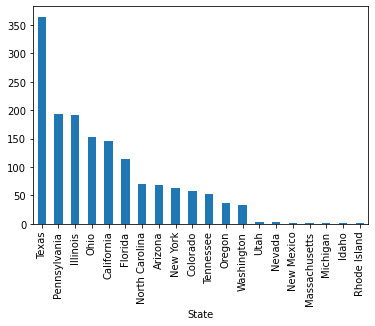

### G. State & category wise Discount Distribution

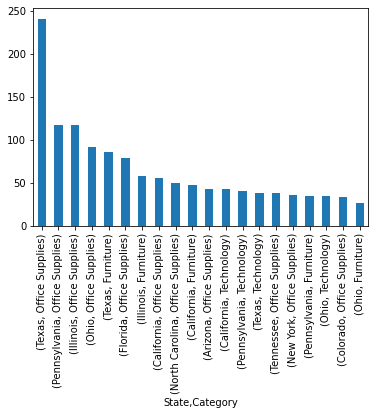

### H. State with Maximum Quantity Ordered/Purchased

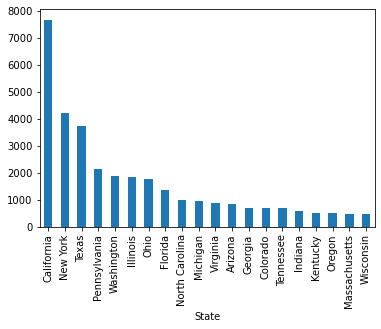

### I. State & Category Wise Quantity Distribution

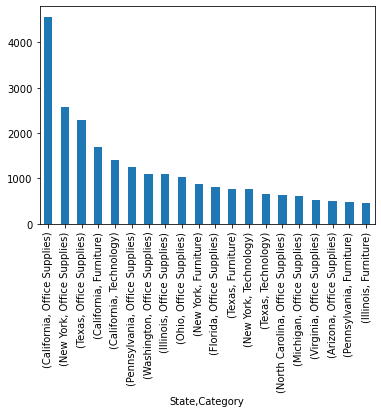

### 21. State & Sub-Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A. States with highest Sub-category sales (Top 10):

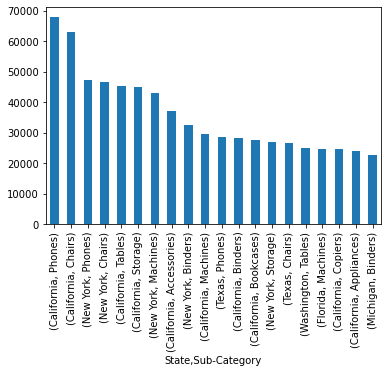

### B. States with lowest Sub-category sales (Last 10):

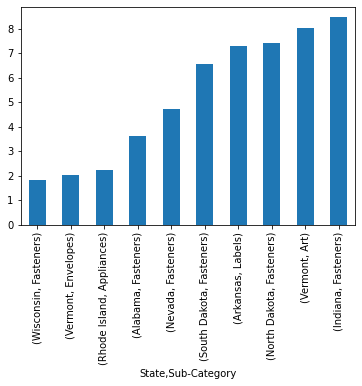

### C. State wise Sub-Category Profit distribution (Top 10):

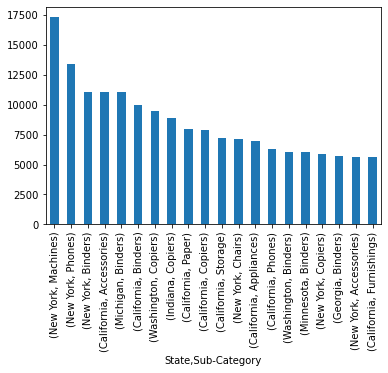

### D. State - SubCategory with Minimum Profit/ Max. Losses incurred:

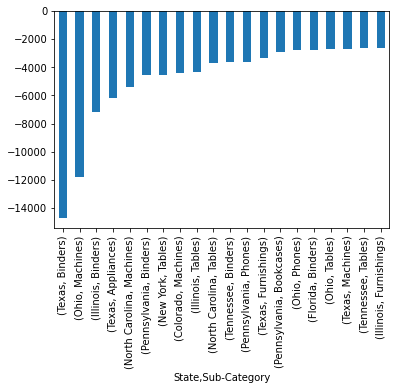

### E. States wise Sub-category Discounts Distribution 

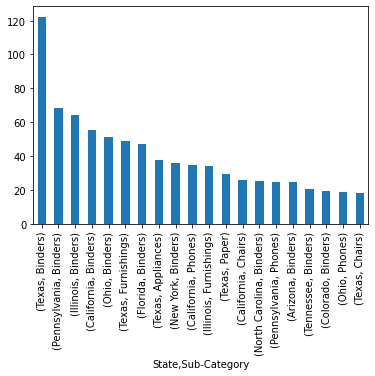

### F. States wise Sub-category Quantity Distribution

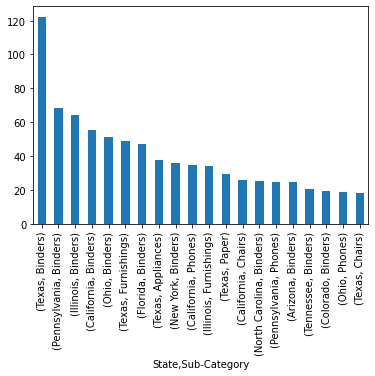

_____________________________________

### 22. Ship Mode & Category Based Sales, Profit, Discount, Quantity Distribution Summary

### A.Ship Mode wise Category sales Distribution

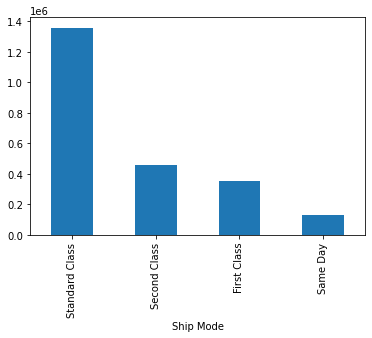

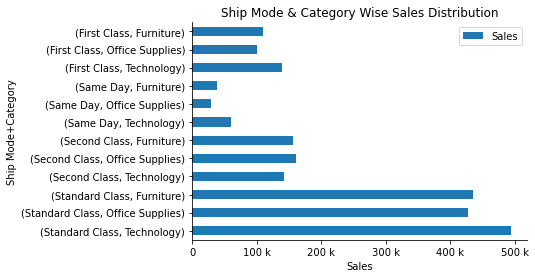

### B.Ship Mode wise Category Profit Distribution 

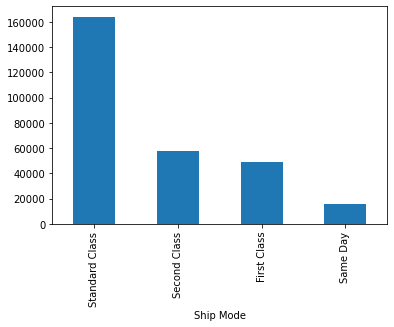

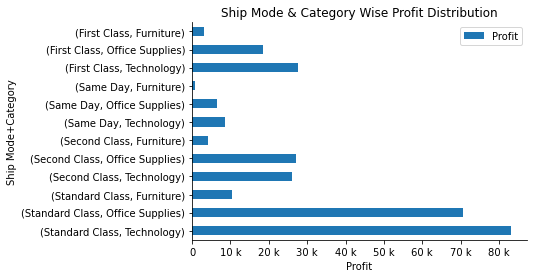

### C. Ship Mode wise Category Discount Distribution 

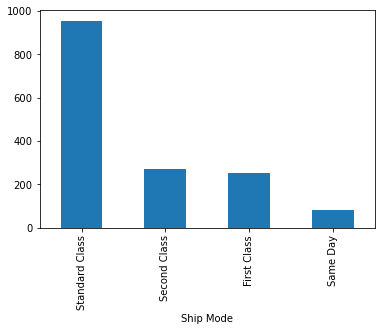

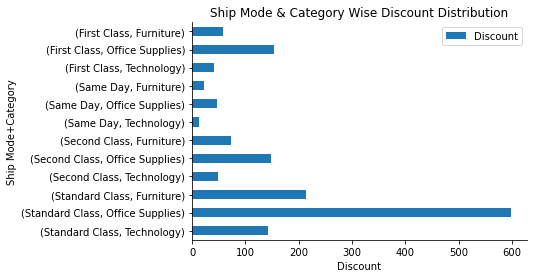

### D.Ship Mode wise Category Quantity Distribution 

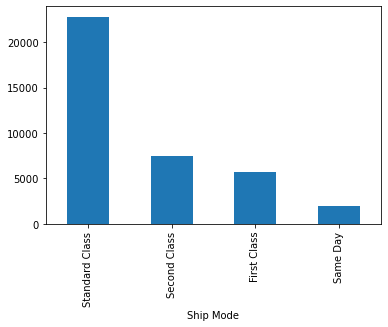

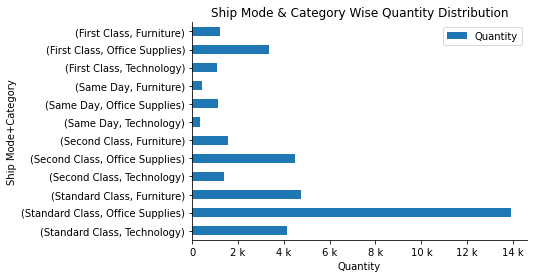

__________________

### 23. City wise Shipping Mode Distribution
The table shows the top 10 cities with highest no. of shipment across multiple modes

In [122]:
df_city_shipmode=pd.crosstab(retail_data.City,retail_data['Ship Mode'], margins=True, margins_name='Total')
df_city_shipmode.reindex(df_city_shipmode['Total'].sort_values(ascending=False)[:10].index)

Ship Mode,First Class,Same Day,Second Class,Standard Class,Total
City,,,,,
Total,1538,543,1945,5968,9994
New York City,147,52,167,549,915
Los Angeles,111,28,159,449,747
Philadelphia,94,16,84,343,537
San Francisco,91,42,90,287,510
Seattle,60,37,82,249,428
Houston,53,16,88,220,377
Chicago,35,11,77,191,314
Columbus,27,23,36,136,222


### 24. Region wise Shipping Mode Distribution
The table shows the different shipment mode details across the 4 regions.

In [123]:
df_region_shipmode=pd.crosstab(retail_data.Region,retail_data['Ship Mode'], margins_name='Total', margins=True )
df_region_shipmode.reindex(df_region_shipmode['Total'].sort_values(ascending=False)[:10].index)

Ship Mode,First Class,Same Day,Second Class,Standard Class,Total
Region,,,,,
Total,1538,543,1945,5968,9994
West,515,185,621,1882,3203
East,490,155,530,1673,2848
Central,299,120,465,1439,2323
South,234,83,329,974,1620


* Standard Class is the choicest mode of shipment across all the 4 regions. 
* Same day shipments are comparatively least preferred across all the regions.

In [124]:
df_region_shipmode_pivot = pd.pivot_table(retail_data,['Sales'],['Region','Ship Mode'],aggfunc=np.sum)
df_region_shipmode_pivot.reindex(df_region_shipmode_pivot['Sales'].sort_values(ascending=False).index)
df_region_shipmode_pivot

Sales
Region  Ship Mode                  
Central First Class      58746.9154
        Same Day         20415.4100
        Second Class    103550.0054
        Standard Class  318527.5600
East    First Class     113587.0530
        Same Day         43326.8320
        Second Class    116545.5240
        Standard Class  405321.8310
South   First Class      49332.5660
        Same Day         21017.1730
        Second Class     93758.6125
        Standard Class  227613.5535
West    First Class     129761.8885
        Same Day         43603.7100
        Second Class    145339.4275
        Standard Class  406752.7985

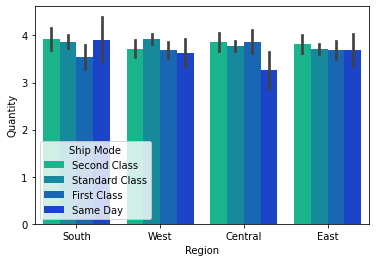

### 25. Category & Subcategory wise  Distribution

In [126]:
df_category_subcat=pd.crosstab(retail_data['Sub-Category'],retail_data['Category'], margins=True, margins_name='Total')
df_category_subcat.reindex(df_category_subcat['Total'].sort_values(ascending=False)[:10].index)
df_category_subcat

Category,Furniture,Office Supplies,Technology,Total
Sub-Category,,,,
Accessories,0,0,775,775
Appliances,0,466,0,466
Art,0,796,0,796
Binders,0,1523,0,1523
Bookcases,228,0,0,228
Chairs,617,0,0,617
Copiers,0,0,68,68
Envelopes,0,254,0,254
Fasteners,0,217,0,217


The above table shows the top 10 sub-categories with highest amount of transactions under respective categories.

The above table shows all the categories of the products and sub-categories under them:

* Furniture: Bookcases, Chairs, Furnishings, Tables
* Office Supplies: Appliances, Art, Binders, Envelopes, Fasteners, Labels, Paper, Storage, Supplies
* Technology: Accessories, Copiers, Machines, Phones
___________
Inference:

1. People have mostly purchased Office Supplies. Closely following are Furniture and technology.
2. Under office supplies, people have purchased mostly Binders, Paper, Stirage, Art, etc.
3. People have purchased mostly Furnishings & Chairs from Furniture Category.
4. In Technology category - people majorly purchased Phones and accessories than other products.

In [127]:
df_cat_subcat_qty_pivot = pd.pivot_table(retail_data,['Quantity'],['Category','Sub-Category'], aggfunc=np.sum)
df_cat_subcat_qty_pivot.reindex(df_cat_subcat_qty_pivot['Quantity'].sort_values(ascending=False).index)
df_cat_subcat_qty_pivot

Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2356
                Furnishings       3563
                Tables            1241
Office Supplies Appliances        1729
                Art               3000
                Binders           5974
                Envelopes          906
                Fasteners          914
                Labels            1400
                Paper             5178
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

### 26. Region wise Shipments shipped through various shipment modes:

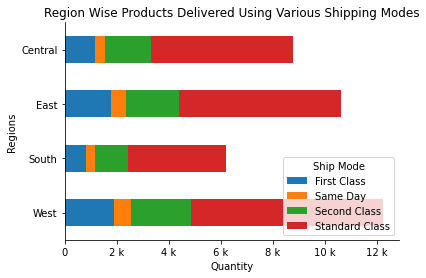

### 27. Region wise Categories Ordered/purchases Distribution:

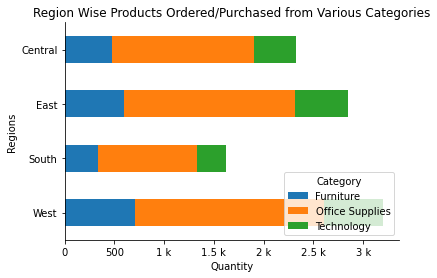

#### Region wise Category Distribution

In [136]:
df_region_category=pd.crosstab(retail_data['Region'],retail_data['Category'], margins=True, margins_name='Total')
df_region_category.reindex(df_region_category['Total'].sort_values(ascending=False)[:10].index)

Category,Furniture,Office Supplies,Technology,Total
Region,,,,
Total,2121,6026,1847,9994
West,707,1897,599,3203
East,601,1712,535,2848
Central,481,1422,420,2323
South,332,995,293,1620


### 28. City - Shipment Mode Based Sales Summary:

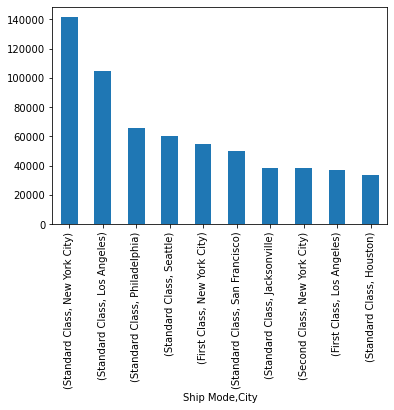

### 29. A. City - Category Based Sales Summary (Top 10):

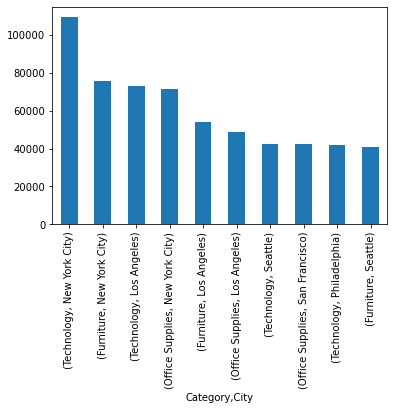

### B. City - Category Based Sales Summary (Last 10):

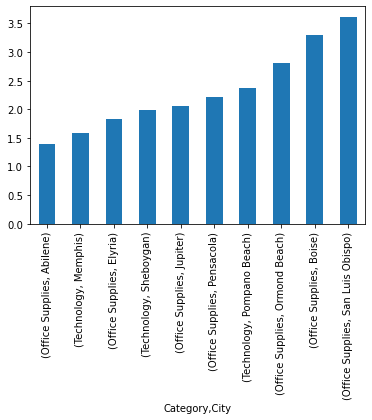

### C. City - Category Based Profit Summary (Top 10):

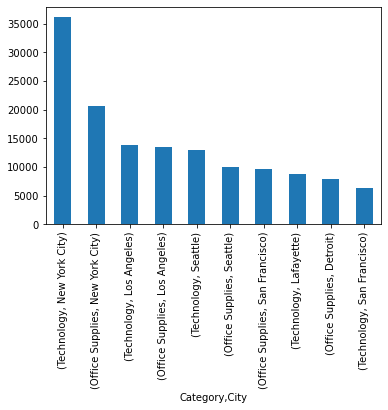

### D. City - Category Based Profit/Loss Summary (Last 10):

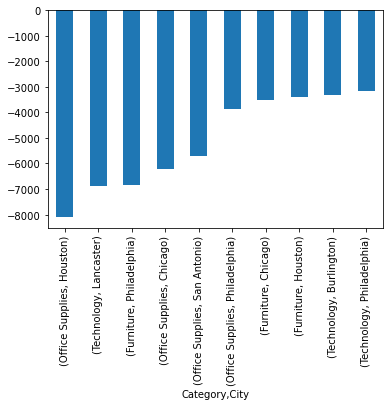

### E. City - Category Based Quantity Purchased/Ordered Summary (Top 10):

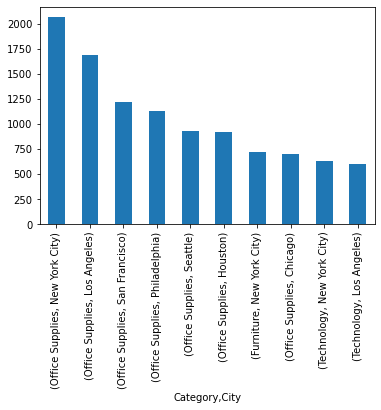

### F. City - Category Based Quantity Purchased/Ordered Summary (Last 10):

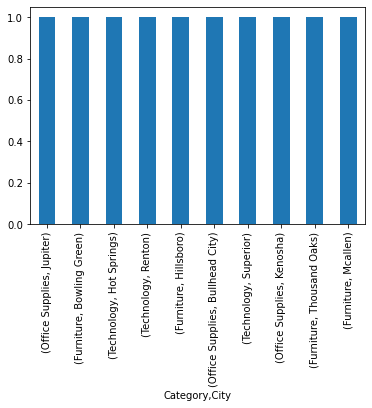

### ANALYSIS:

1. The most preferred Ship mode is Standard Class having Maximum Sales & Maximum Profit.Its in the First Class Ship Mode, we can find orders having maximum profit than sales. We must find which Category's sub-categories are getting shipped and to which region, by which segment of customers.

2. Inspite of getting majority of the orders from Consumer segment and with highest sales and profit amongst all, Corporate and Home Office segments are earning more profits than sales We must look into the Categories, Sub-Categories beig ordered and shipped to which State and Region.

3. Customers from West and East regions are placing more orders as compared to other regions. They are the regions earning more profits than sales, inspite of their sales being highest amongst all. We must find Category & Sub categories ordered from these regions. Central & South Regions are getting lesser sales and earning lesser profits.

4. Categories like Office Supplies and Technology are earning major profits than sales. Furniture Category is earning lesser profits. Again, which are these subcategories leading the resulting sales and profits.

#### The Data has:
Category- Subcategory Distribution:
* Furniture: Bookcases, Chairs, Furnishings, Tables
* Office Supplies: Appliances, Art, Binders, Envelopes, Fasteners, Labels, Paper, Storage, Supplies
* Technology: Accessories, Copiers, Machines, Phones

Max. profit earned from Region: West
* In Central region only, in the furniture category, we can see some losses incurred.
* In cental region, Max. profit was seen in Technology category
* In East region, Max. profit was seen in Technology category and Office Supplies category.
* In South region as well, we can see major profits gained in Office Supplies & Technology category.
* In west region, We can see max profit was gained in Technology category and Office supplies categories.

Major selling product across categories:
* Furniture: Furnishings, Chairs
* Office Supplies: Binders, Papers, Storage, Art
* Technology: Phones, Accessories

Profit/Loss across categories and subcategory:
* Tables and Bookcases under Furniture category incurred losses.
* Supplies under Office Supplies incurred losses.


States with maximum sales & their regions:

* Central: Texas (170188.0458), Illinois(80166.1010), Michigan (76269.6140) have highest sales in this region
* East: New Your (310876.2710) & Pennsylvania (116511.9140) have highest sales in this region
* South: Florida (89473.7080) & Virginia(70636.72) have highest sales in this region
* West: California(457687.6315) & Washington(138641.27) have highest sales in this region

Region & States with maximum profits/losses & their regions:

* Central: Michigan (24463.1876) and Indiana (18382.9363) have highest profits in this region. Texas (-25729.3563) & Illinois(-12607.8870) have incurred huge losses irrespective of higher sales.
* East: New York(74038.5486) have highest profits in this region. Ohio (-16971.3766) & Pennsylvania(-15559.9603) have incurred huge losses. Lowest profits: West Virginia (185.9216)
* South: Virginia(18597.9504), Georgia(16250.0433) & Kentucky(11199.6966) have highest profits in this region. Florida (3399.3017), North Carolina(-7490.9122) & Tennessee(-5341.6936) have incurred max. losses. Lowest Profit: South Carolina(1769.0566)
* West: California(76381.3871) & Washington(33402.6517) have highest profits in this region. Arizona(3427.9246), Colorado(6527.8579), Oregon (1190.4705) have incurred losses. Lowest profits at Wyoming(100.1960)

#### We can infer that:
1. People have mostly purchased Office Supplies. Closely following are Furniture and technology.
2. Under office supplies, people have purchased mostly Binders, Paper, Stirage, Art, etc.
3. People have purchased mostly Furnishings & Chairs from Furniture Category.
4. In Technology category - people majorly purchased Phones and accessories than other products.

5. From the data, we can derive that:
   Category Profit(Technology) > Profit(Supplies) > Profit(Furniture) => Simply because Sales(Technology) > Sales(Supplies) > Sales(Furniture) : Ship Mode

6. For Category Office Supplies, we can see huge discounts given across all the regions, which are impacing the profits mainly in region like Central, East. Also, for Furniture Category we can see, high sales but low profits across all the regions. West and East are earning huge profits due to high sales and lesser discounts offered in this section of ctegory.

7. Under Furniture Category: All the subcategories (Boo Cases, Chairs, Furnishings) are earning lesser profits, inspite of higher sales Under Technology: Phones, Copiers, Accessories are giving better profits, especially copiers and accessories we can infer they are getting more profits than other subcategories in this category. Under Office Supplies, except for papers and binders, every other subcategory are yielding lesser profits, or they are not being ordered/ less ordered, at all by the customers. However, we can see that its the Binder Sub- category on which maximum discounts are being offered. Therefore overall, subcategories: Copiers, Phones, Accessories, Paper, Binders, Chairs and storage are yielding profits. Boocases, Supplies and Tables are yielding losses.

8. Across all the segments we can see that major discounts are given on Office Supplies Sub-Category, as they were ordered more. Office supplies are ordered more from all the regions.

### Thank You